<a href="https://colab.research.google.com/github/vilsonrodrigues/DataScienceEduc/blob/master/An%C3%A1lise_Tabela_Submiss%C3%B5es-final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise da tabela submissões 
0. Quantidade submissões menores que 100% de questões por lista 
1. Número de submissões de questão por aluno
2. Número de submissões em que o aluno tirou menos que 100
3. Aluno que tenha sub mas nao tenha turma
4. Ta na turma mas n submeteu
ano ate turma - table turma
idLista ate ano - table sub

Importação de Bibliotecas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from csv import reader

Leitura de tabela

In [209]:
table = pd.read_csv("https://github.com/repitta/CienciaDeDadosEducacionais/raw/master/arquivosCSV/lopUseTurmasSubLista.csv")
table.drop(columns=["Unnamed: 0"])



,idLista,questao,titulo,quantidade,data,porcentagemAcerto,idAluno,ano,idTurma,descricaoTurma,matricula,nome
0,598cd57a3bc48946977dcf67,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,5.0,2017-08-14 16:19:03.629000+00:00,0.0,5991cd63b3c8b42f3d5da402,2017.2,598e15296d8650eb27d52e3d,LÓGICA DE PROGRAMAÇÃO - Turma 01A,2.017010e+10,Lucas Dantas
1,598cd57a3bc48946977dcf67,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,5.0,2017-08-14 16:19:43.260000+00:00,0.0,5991cd63b3c8b42f3d5da402,2017.2,598e15296d8650eb27d52e3d,LÓGICA DE PROGRAMAÇÃO - Turma 01A,2.017010e+10,Lucas Dantas
2,598cd57a3bc48946977dcf67,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,5.0,2017-08-14 16:20:55.198000+00:00,0.0,5991cd63b3c8b42f3d5da402,2017.2,598e15296d8650eb27d52e3d,LÓGICA DE PROGRAMAÇÃO - Turma 01A,2.017010e+10,Lucas Dantas
3,598cd57a3bc48946977dcf67,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,5.0,2017-08-14 16:21:53.733000+00:00,0.0,5991cd63b3c8b42f3d5da402,2017.2,598e15296d8650eb27d52e3d,LÓGICA DE PROGRAMAÇÃO - Turma 01A,2.017010e+10,Lucas Dantas
4,598cd57a3bc48946977dcf67,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,5.0,2017-08-14 16:22:15.073000+00:00,0.0,5991cd63b3c8b42f3d5da402,2017.2,598e15296d8650eb27d52e3d,LÓGICA DE PROGRAMAÇÃO - Turma 01A,2.017010e+10,Lucas Dantas
5,598cd57a3bc48946977dcf67,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,5.0,2017-08-14 16:22:38.972000+00:00,100.0,5991cd63b3c8b42f3d5da402,2017.2,598e15296d8650eb27d52e3d,LÓGICA DE PROGRAMAÇÃO - Turma 01A,2.017010e+10,Lucas Dantas
6,59c859ad3ccb990189c845ac,59885f8d684f4a3f78163c00,Lista de Exercícios 1 - Expressões e variáveis,15.0,2017-08-14 16:19:03.629000+00:00,0.0,5991cd63b3c8b42f3d5da402,2017.2,598e15296d8650eb27d52e3d,LÓGICA DE PROGRAMAÇÃO - Turma 01A,2.017010e+10,Lucas Dantas
7,59c859ad3ccb990189c845ac,59885f8d684f4a3f78163c00,Lista de Exercícios 1 - Expressões e variáveis,15.0,2017-08-14 16:19:43.260000+00:00,0.0,5991cd63b3c8b42f3d5da402,2017.2,598e15296d8650eb27d52e3d,LÓGICA DE PROGRAMAÇÃO - Turma 01A,2.017010e+10,Lucas Dantas
8,59c859ad3ccb990189c845ac,59885f8d684f4a3f78163c00,Lista de Exercícios 1 - Expressões e variáveis,15.0,2017-08-14 16:20:55.198000+00:00,0.0,5991cd63b3c8b42f3d5da402,2017.2,598e15296d8650eb27d52e3d,LÓGICA DE PROGRAMAÇÃO - Turma 01A,2.017010e+10,Lucas Dantas
9,59c859ad3ccb990189c845ac,59885f8d684f4a3f78163c00,Lista de Exercícios 1 - Expressões e variáveis,15.0,2017-08-14 16:21:53.733000+00:00,0.0,5991cd63b3c8b42f3d5da402,2017.2,598e15296d8650eb27d52e3d,LÓGICA DE PROGRAMAÇÃO - Turma 01A,2.017010e+10,Lucas Dantas


In [0]:
table

In [34]:
table.columns

Index(['Unnamed: 0', 'idLista', 'questao', 'titulo', 'quantidade', 'data',
       'porcentagemAcerto', 'idAluno', 'ano', 'idTurma', 'descricaoTurma',
       'matricula', 'nome'],
      dtype='object')

In [97]:
table.shape

(50143, 13)

Quantidade de alunos que não tenham submissão mas estão associado a turma 

In [0]:
table["idTurma"] = table["idTurma"].dropna()
subSturma = table.loc[table["questao"].isna(),["idTurma","ano","questao"]]
subSturma = subSturma.groupby("idTurma")["ano"].count().reset_index().sort_values(by="idTurma")
subSturma.rename(columns={"ano":"quantidade"},inplace=True)
subSturma

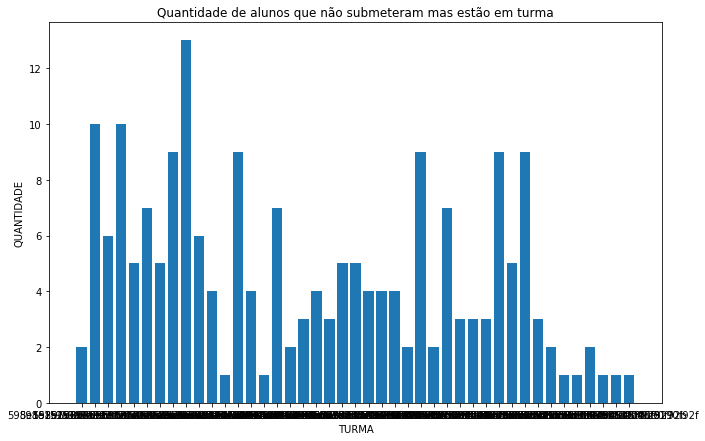

In [248]:
plt.bar(subSturma["idTurma"],subSturma["quantidade"])
plt.title("Quantidade de alunos que não submeteram mas estão em turma")
plt.xlabel("TURMA")
plt.ylabel("QUANTIDADE")
plt.show()

In [0]:
table.replace(np.nan,0,inplace=True)

Quantidade de submissões igual a 100% por questão

In [218]:
igualACem = table.loc[table["porcentagemAcerto"]==100,["questao","porcentagemAcerto"]]
igualACem = igualACem.groupby("questao")["porcentagemAcerto"].count().reset_index().sort_values(by="questao")
igualACem.rename(columns={"porcentagemAcerto":"quantidade"},inplace=True)
igualACem.sum()
#Pronto



questao       59885f8d684f4a3f78163c0059887121d7c3703f96fda0...
quantidade                                                45360
dtype: object

Quantidade submissões menores que 100% de questões por lista


In [217]:
menorQCem = table.loc[table["porcentagemAcerto"]<100,["questao","porcentagemAcerto"]]
menorQCem = menorQCem.groupby("questao")["porcentagemAcerto"].count().reset_index().sort_values(by="questao")
menorQCem.rename(columns={"porcentagemAcerto":"quantidade"},inplace=True)
menorQCem.sum()
#menorQCem.info()
#pronto


questao       59885f8d684f4a3f78163c0059887121d7c3703f96fda0...
quantidade                                                 4381
dtype: object

Total de submissões por questão

In [0]:
total = table.groupby("questao")["quantidade"].count().reset_index().sort_values(by="questao")
total.head()

Tabela de submissões 

In [0]:
tableSub = pd.DataFrame()
tableSub["questao"] = igualACem["questao"]
tableSub["igualACem"] = igualACem["quantidade"]
tableSub["menorQCem"] = menorQCem["quantidade"]
tableSub["totalSub"] = total["quantidade"]
tableSub.head()

Gráfico com número de questões maiores e iguais a 100

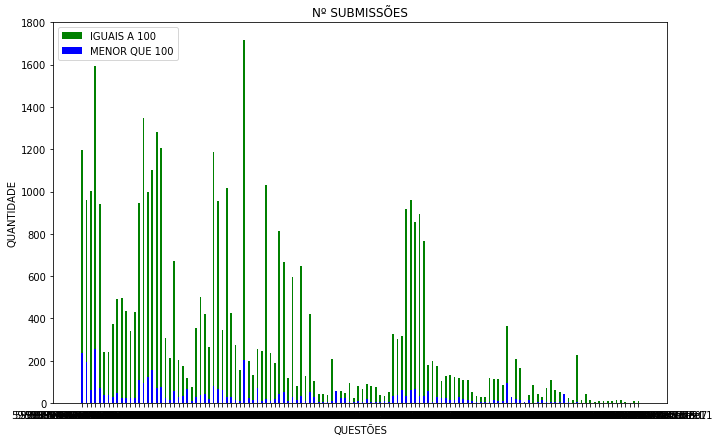

In [242]:
width = 0.40
height = 1.00
plt.bar(tableSub["questao"],tableSub["igualACem"],width,height,color="g",label="IGUAIS A 100")
plt.bar(tableSub["questao"],tableSub["menorQCem"],width,height,color="b",label="MENOR QUE 100")
plt.title("Nº SUBMISSÕES")
plt.xlabel("QUESTÕES")
plt.ylabel("QUANTIDADE")
plt.legend()
plt.show()


Gráfico com número total de submissões 

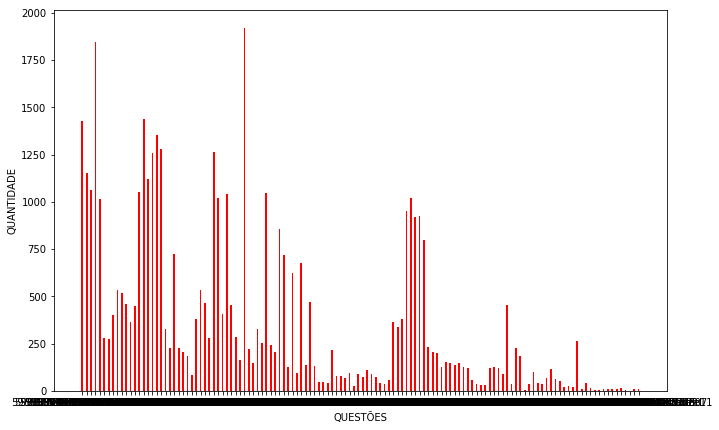

In [245]:
width = 0.40
plt.bar(tableSub["questao"],tableSub["totalSub"],width,color="r")
plt.xlabel("QUESTÕES")
plt.ylabel("QUANTIDADE")
plt.show()

Número de questões 

Área de links e testes

df.groupby("container_id")["user_id"].nunique().to_frame()

df1 = df.groupby('product')['value'].sum().to_frame().reset_index()

df2 = df.groupby('product')['value'].sum().to_frame().reset_index().sort_values(by='value')

http://queirozf.com/entries/pandas-dataframe-groupby-examples